
# Introduction

# Shape feature extraction

In [1]:
# Load the required libraries
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Load the cell images
cyto = ski.io.imread("data/F01_202w1.TIF")
nuc = ski.io.imread("data/F01_202w2.TIF")

# Triange threshold the cytoplasm
cyto_bin = cyto > ski.filters.threshold_triangle(cyto)

# Get the distance trasform of the nucleus
cyto_dist = ndi.distance_transform_edt(cyto_bin)
# Negate the distance so that the cell boundars have
# the largest value, and the innermost regions of a
# cell have the least value
cyto_dist = - cyto_dist

# Otsu threshold the nucleus
nuc_bin = nuc > ski.filters.threshold_otsu(nuc)
# Get the connected components of the nucleus
# These will be used as seeds for the watershed segmentation
nuc_label = ski.morphology.label(nuc_bin)

# Watershed segmentation
label_img = ski.segmentation.watershed(cyto_dist, 
                markers = nuc_label, mask = cyto_bin)
print('Number of segmented objects = ' + str(label_img.max()))

Number of segmented objects = 117


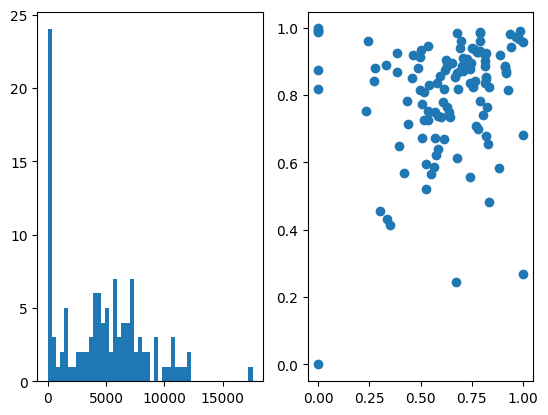

In [44]:
cyto_shapes = ski.measure.regionprops(label_img)
nuc_shapes = ski.measure.regionprops(nuc_label)

n_area = []
n_eccentricity = []
c_area = []
c_eccentricity = []
for c, n in zip(cyto_shapes, nuc_shapes):
    n_area.append(n.area)
    n_eccentricity.append(n.eccentricity)
    c_area.append(c.area)
    c_eccentricity.append(c.eccentricity)

fig, ax = plt.subplots(1, 2)
ax[0].hist(c_area, bins = 50)
ax[1].scatter(n_eccentricity, c_eccentricity)

# Intensity feature extraction
cyto_intensity = ski.measure.regionprops(label_img, intensity_image = cyto)
nuc_intensity = ski.measure.regionprops(nuc_label, intensity_image = nuc)

# Texture feature extraction